## Expected SARSA

Expected SARSA es una variante del algoritmo SARSA (State-Action-Reward-State-Action) para aprendizaje por refuerzo.

- Diferencias con SARSA:

La principal diferencia es que Expected SARSA utiliza el valor esperado de la acción siguiente en lugar de muestrear una acción específica como lo hace SARSA.
En SARSA, se actualiza el valor Q(s,a) usando la recompensa inmediata y el valor Q de la siguiente acción seleccionada:
Q(s,a) ← Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
En Expected SARSA, se usa el valor esperado de las acciones posibles en el siguiente estado:
Q(s,a) ← Q(s,a) + α[r + γΣπ(a'|s')Q(s',a') - Q(s,a)]
Donde π(a'|s') es la probabilidad de tomar la acción a' en el estado s' según la política actual.

- Utilidad de las modificaciones:

Reduce la varianza en las actualizaciones, lo que puede llevar a un aprendizaje más estable.
Puede converger más rápidamente que SARSA en algunos entornos.
Es más robusto frente a políticas de exploración no óptimas durante el entrenamiento.


## n-step TD

n-step TD (Temporal Difference) es una generalización de los métodos TD que considera múltiples pasos futuros para las actualizaciones.

-  Diferencias con TD(0):

TD(0) solo considera la recompensa inmediata y la estimación del siguiente estado. n-step TD considera n pasos hacia el futuro antes de hacer una actualización.

-  Utilidad de esta modificación:

Permite un balance entre el sesgo y la varianza en el aprendizaje.
Puede acelerar el aprendizaje al propagar la información más rápidamente.

Combina aspectos de TD(0) y Monte Carlo, permitiendo ajustar el compromiso entre ambos.

-  Objetivo utilizado:

El objetivo en n-step TD es la suma de las recompensas sobre n pasos más el valor estimado del estado n pasos adelante:
Gt:t+n = Rt+1 + γRt+2 + ... + γ^(n-1)Rt+n + γ^n V(St+n)

## Diferencia entre SARSA y Q-learning

Las principales diferencias son:

Política de actualización:
SARSA es on-policy, lo que significa que aprende los valores Q para la política que está siguiendo actualmente.
Q-learning es off-policy, aprendiendo la política óptima independientemente de la política de exploración utilizada.

Fórmula de actualización:
SARSA: Q(s,a) ← Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
Q-learning: Q(s,a) ← Q(s,a) + α[r + γ max_a' Q(s',a') - Q(s,a)]

Convergencia:
Q-learning converge a la política óptima si se explora suficientemente, incluso con una política de exploración subóptima.
SARSA converge a la política óptima solo si la exploración disminuye con el tiempo.

Comportamiento:
SARSA tiende a ser más conservador, considerando el riesgo asociado con la exploración.
Q-learning es más agresivo, siempre apuntando a la acción óptima.

In [36]:
# Reinforcement Learning - Laboratorio 4
# Comparación de SARSA y Q-Learning en el entorno CliffWalking-v0

# Paso 1: Instalar las bibliotecas necesarias
!pip install gymnasium matplotlib

In [37]:
# Reinforcement Learning - Comparación de SARSA y Q-Learning en CliffWalking-v0

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Configuración del entorno y parámetros
env = gym.make('CliffWalking-v0')

episodes = 500  # Número de episodios

alpha_list = [0.1, 0.1, 0.5]
gamma_list = [0.88, 0.99, 0.9]
epsilon_list = [0.1, 0.5, 0.1]

In [39]:
# Implementación de SARSA
def sarsa(env, alpha, gamma, epsilon, episodes):
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.zeros((n_states, n_actions))
    rewards = []

    for _ in range(episodes):
        state, _ = env.reset()
        action = np.random.choice(n_actions) if np.random.rand() < epsilon else np.argmax(Q[state])
        total_reward = 0

        while True:
            next_state, reward, done, _, _ = env.step(action)
            next_action = np.random.choice(n_actions) if np.random.rand() < epsilon else np.argmax(Q[next_state])

            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state, action = next_state, next_action
            total_reward += reward

            if done:
                break

        rewards.append(total_reward)
    return rewards

In [40]:
# Implementación de Q-Learning
def q_learning(env, episodes, alpha, gamma, epsilon):
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.zeros((n_states, n_actions))
    rewards_per_episode = []

    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Selección de acción usando política epsilon-greedy
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            # Tomar la acción y observar el resultado
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Actualización de Q-value
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode

Ejecutando SARSA con alpha=0.1, gamma=0.88, epsilon=0.1


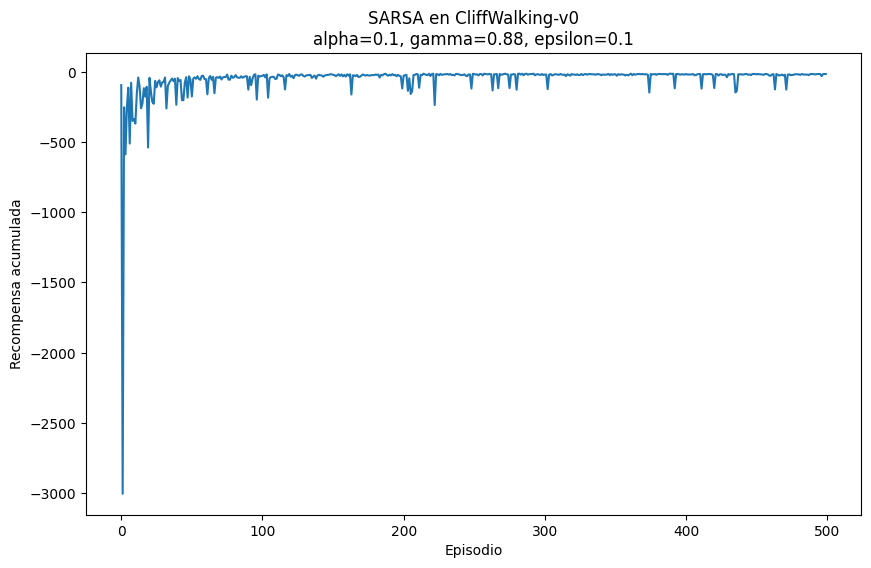

Ejecutando SARSA con alpha=0.1, gamma=0.99, epsilon=0.5


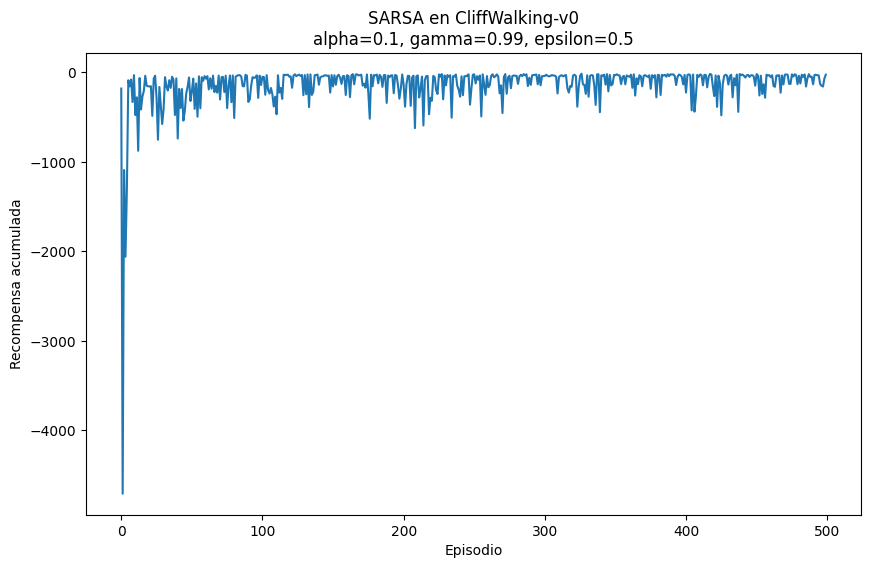

Ejecutando SARSA con alpha=0.5, gamma=0.9, epsilon=0.1


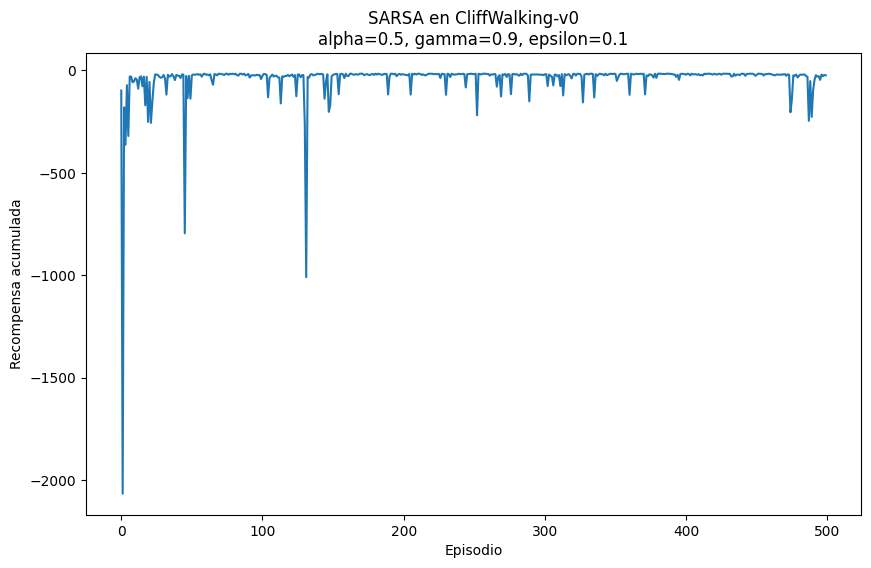

In [41]:
# Ejecución de SARSA y Q-Learning con diferentes combinaciones de parámetros
for i, (alpha, gamma, epsilon) in enumerate(zip(alpha_list, gamma_list, epsilon_list)):
    print(f'Ejecutando SARSA con alpha={alpha}, gamma={gamma}, epsilon={epsilon}')
    sarsa_rewards = sarsa(env, alpha, gamma, epsilon, episodes)

    plt.figure(figsize=(10, 6))
    plt.plot(sarsa_rewards)
    plt.title(f'SARSA en CliffWalking-v0\nalpha={alpha}, gamma={gamma}, epsilon={epsilon}')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa acumulada')
    plt.show()

Ejecutando Q-Learning con alpha=0.1, gamma=0.88, epsilon=0.1


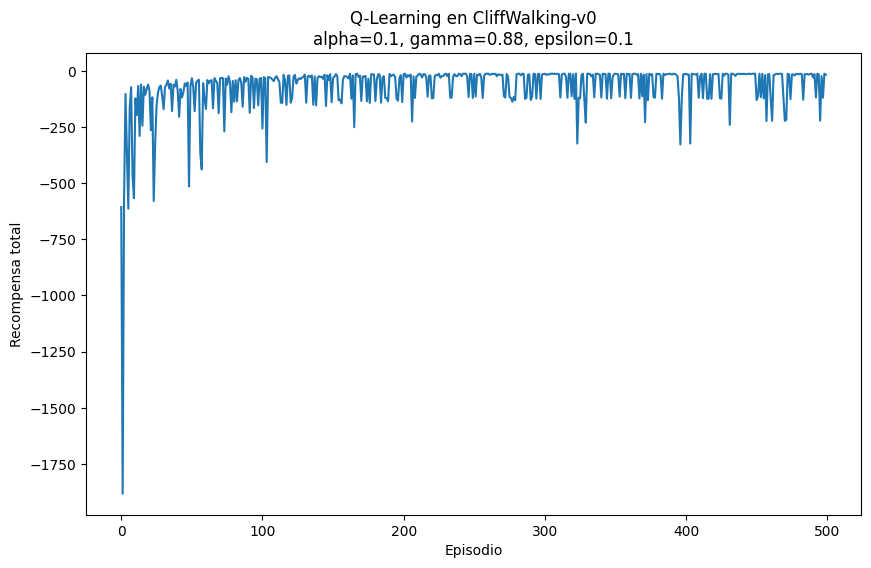

Ejecutando Q-Learning con alpha=0.1, gamma=0.99, epsilon=0.5


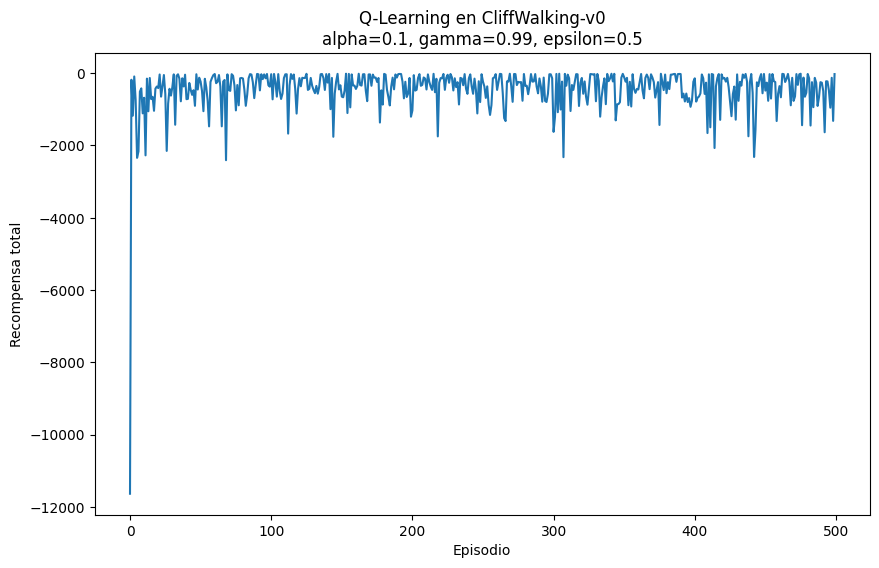

Ejecutando Q-Learning con alpha=0.5, gamma=0.9, epsilon=0.1


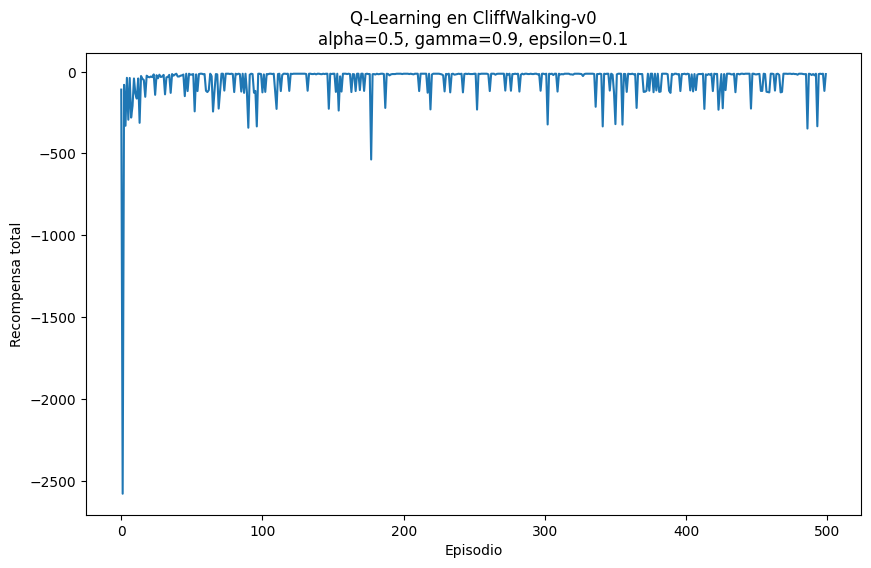

In [42]:
for i, (alpha, gamma, epsilon) in enumerate(zip(alpha_list, gamma_list, epsilon_list)):
    print(f'Ejecutando Q-Learning con alpha={alpha}, gamma={gamma}, epsilon={epsilon}')
    q_learning_rewards = q_learning(env, episodes, alpha, gamma, epsilon)

    plt.figure(figsize=(10, 6))
    plt.plot(q_learning_rewards)
    plt.title(f'Q-Learning en CliffWalking-v0\nalpha={alpha}, gamma={gamma}, epsilon={epsilon}')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa total')
    plt.show()

### a. P1: ¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?

- **SARSA**: Los gráficos de SARSA muestran un patrón de recompensas donde, tras una fase inicial de alta variabilidad, las recompensas se estabilizan más cerca de cero, con fluctuaciones menores a lo largo de los episodios. Esto indica que SARSA tiende a aprender una política que evita las penalizaciones más severas, siguiendo un enfoque más conservador.

- **Q-Learning**: Los gráficos de Q-Learning, en cambio, muestran una mayor variabilidad en las recompensas a lo largo de los episodios, incluso después de la fase inicial. Esto refleja la naturaleza más agresiva de Q-Learning, que busca siempre maximizar la recompensa posible, incluso a costa de experimentar caídas significativas cuando explora acciones que resultan en penalizaciones severas.

### b. P2: ¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA?

Q-Learning es más optimista porque, en cada actualización, asume que el agente siempre tomará la mejor acción posible en el siguiente estado, es decir, la acción que maximiza el valor Q. Esto lleva a Q-Learning a preferir políticas que buscan maximizar las recompensas esperadas, lo que a veces resulta en mayores fluctuaciones en las recompensas, especialmente en entornos con penalizaciones significativas como CliffWalking.

En contraste, SARSA actualiza los valores Q basándose en la acción que realmente se tomó, lo que puede no ser la mejor acción disponible según la política óptima, pero refleja la realidad de la exploración del agente. Este enfoque es menos optimista y tiende a ser más conservador, lo que se refleja en una menor variabilidad en las recompensas una vez que la política se ha estabilizado.

### c. P3: ¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparación con la naturaleza "off-policy" de Q-Learning?

La naturaleza "on-policy" de SARSA significa que el agente actualiza los valores Q basándose en la política que realmente sigue durante el entrenamiento. Esto conduce a un aprendizaje más conservador y seguro, ya que el agente tiene en cuenta los riesgos asociados con la exploración. SARSA tiende a converger a una política que es segura y estable, aunque puede no ser la óptima en términos de maximización de la recompensa.

Por otro lado, Q-Learning, al ser "off-policy", actualiza los valores Q suponiendo que el agente siempre tomará la mejor acción posible en el futuro, independientemente de la política actual de exploración. Esto permite a Q-Learning aprender políticas más agresivas y potencialmente más recompensantes, pero también más arriesgadas, lo que puede resultar en una mayor variabilidad en las recompensas durante el entrenamiento.

### d. P4: Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el camino más seguro? ¿Por qué?

SARSA parece aprender el camino más seguro. Esto se refleja en la estabilidad de las recompensas acumuladas a lo largo de los episodios, donde SARSA evita las caídas drásticas que se observan en los gráficos de Q-Learning. La naturaleza on-policy de SARSA hace que el agente tenga en cuenta los riesgos durante la exploración, lo que lo lleva a evitar acciones que podrían resultar en penalizaciones severas, como caer en el acantilado en el entorno CliffWalking.

Q-Learning, en su búsqueda por maximizar la recompensa a largo plazo, a veces toma decisiones más arriesgadas que pueden llevar a penalizaciones más grandes, como se observa en la mayor variabilidad y las caídas severas en las recompensas totales.

### e. P5: ¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada algoritmo?

- **SARSA**: Una disminución gradual de `epsilon` con el tiempo permitiría a SARSA explotar más su política aprendida, lo que podría conducir a una mayor estabilidad y a una mejora continua en la recompensa acumulada. Como SARSA ya tiende a ser conservador, una disminución en `epsilon` ayudaría a consolidar la política aprendida, reduciendo la variabilidad en las recompensas.

- **Q-Learning**: En Q-Learning, reducir `epsilon` con el tiempo también permitiría al agente explotar más su política óptima. Sin embargo, debido a la naturaleza más agresiva de Q-Learning, una disminución demasiado rápida de `epsilon` podría llevar a que el agente no explore suficientemente, lo que podría resultar en una convergencia hacia una política subóptima. Por otro lado, si la disminución es adecuada, Q-Learning podría beneficiarse significativamente al explotar la política óptima con menos riesgo de penalizaciones severas.


### 1. ¿Cuál es el valor estimado de mantener diferentes niveles de existencias para cada producto?

El valor estimado de mantener diferentes niveles de existencias para cada producto depende de factores como la demanda, el costo de almacenamiento, la probabilidad de ruptura de stock, y las posibles pérdidas por obsolescencia. Modelos de gestión de inventarios como EOQ (Economic Order Quantity) y modelos de inventario con demanda estocástica son comúnmente utilizados para optimizar estos niveles, minimizando el costo total del inventario.

### 2. ¿Cómo afecta el valor epsilon en la política blanda al rendimiento?

El valor de `epsilon` en una política epsilon-greedy afecta el equilibrio entre la exploración y la explotación:

- **Epsilon alto**: Promueve la exploración, ayudando al agente a descubrir nuevas estrategias, pero puede ralentizar la convergencia a una política óptima.
- **Epsilon bajo**: Favorece la explotación de la política actual, lo que puede acelerar la convergencia, pero corre el riesgo de que el agente se quede atrapado en una política subóptima.

### 3. ¿Cuál es el impacto de utilizar el aprendizaje fuera de la política en comparación con el aprendizaje dentro de la política?

- **Aprendizaje dentro de la política (On-Policy)**: Como en SARSA, el agente aprende basándose en las acciones que realmente toma, lo que tiende a ser más conservador y estable, pero puede resultar en una convergencia más lenta.

- **Aprendizaje fuera de la política (Off-Policy)**: Como en Q-Learning, el agente aprende la política óptima basándose en la mejor acción posible en cada estado, independientemente de las acciones que realmente toma, lo que puede conducir a una convergencia más rápida pero con un mayor riesgo de inestabilidad.


## Referencias

- **GeeksforGeeks. (2020, August 31).** Expected SARSA in Reinforcement Learning. GeeksforGeeks; GeeksforGeeks. https://www.geeksforgeeks.org/expected-sarsa-in-reinforcement-learning/

- **Zhang, J. (2019, June 28). N-step TD Method** - Zero Equals False - Medium. Medium; Zero Equals False. https://medium.com/zero-equals-false/n-step-td-method-157d3875b9cb

- **Sutton, R. S., & Barto, A. G. (2018).** *Reinforcement Learning: An Introduction* (2nd ed.). MIT Press.

- **Watkins, C. J. C. H., & Dayan, P. (1992).** "Q-Learning." *Machine Learning*, 8(3-4), 279–292.
